## Code Snippets

<h3> Random Sampling

In [1]:
# This code snippet samples 30 rows randomly from the iris dataset

import random

from sklearn import datasets
iris = datasets.load_iris()
d = iris.data
d.shape

# For loop to generate 30 samples
# For every run, a random number between 0 and 1 is generated
# The random number is multiplied with the length of the dataset
# The integer part of the product is used as the row index
for i in range(0, 30):
    print (d[int(random.random() * len(d)),:])
    

[4.5 2.3 1.3 0.3]
[6.1 3.  4.6 1.4]
[5.1 3.7 1.5 0.4]
[5.7 4.4 1.5 0.4]
[6.5 3.  5.8 2.2]
[5.6 2.5 3.9 1.1]
[5.1 3.8 1.5 0.3]
[4.9 3.1 1.5 0.1]
[5.1 3.8 1.9 0.4]
[7.7 2.8 6.7 2. ]
[5.  3.6 1.4 0.2]
[6.1 3.  4.6 1.4]
[5.2 3.4 1.4 0.2]
[6.2 3.4 5.4 2.3]
[6.3 3.3 4.7 1.6]
[7.7 2.8 6.7 2. ]
[6.7 3.3 5.7 2.1]
[6.7 3.3 5.7 2.5]
[6.7 3.1 4.4 1.4]
[6.2 2.9 4.3 1.3]
[5.8 2.8 5.1 2.4]
[6.1 2.8 4.7 1.2]
[6.3 2.7 4.9 1.8]
[6.7 3.  5.  1.7]
[7.7 3.  6.1 2.3]
[5.1 3.4 1.5 0.2]
[6.4 2.8 5.6 2.2]
[6.4 3.2 5.3 2.3]
[5.7 2.5 5.  2. ]
[5.8 4.  1.2 0.2]


<h3> Hypothesis Testing Using Resampling & Permutation of Means

In [64]:

# Initialize/load the required modules

import numpy as np
import random
from scipy import stats

# Initialize the two samples drawn from the populations

Class_1 = np.array([180, 187, 179, 175, 174, 181, 168, 182, 180, 181])
Class_2 = np.array([182, 156, 167, 183, 177, 176, 175, 172, 165, 168])

# Initialize the numpy arrays for holding the resampled values and the difference between the resampled means

Class_Sample1  = np.array([0.0 for i in range(10)])
Class_Sample2  = np.array([0.0 for i in range(10)])
Class_MeanDiff = np.array([0.0 for i in range(1000)])

# Initialize significance level
S_Level = 1

# Evaluate the difference between the sample means

mean_diff = np.mean(Class_1) - np.mean(Class_2)

# Combine the samples together

Class_Combined = np.append(Class_1, Class_2)

# For loop to iterate/generate 1000 samples (resampling) to simulate H0
for i in range(0,1000):
    # For loop to generate 10 random values from the combined set of values
    for j in range(0, 10):
        # Resample the 1st array
        Class_Sample1[j] = Class_Combined[int(random.random() * len(Class_Combined))]
        # Resample the 2nd array
        Class_Sample2[j] = Class_Combined[int(random.random() * len(Class_Combined))]
    
    # Evaluate the difference between resampled means and set the value in the mean difference array
    Class_MeanDiff[i] =  np.mean(Class_Sample1) - np.mean(Class_Sample2)

# Print the output in the desired format
# Derive probability from percentile value
# Evaluate the p value and print the outcome of the test based on the significance level

print("1. The difference between the sample means = {}".format(round(mean_diff, 4)))

print("2. The percentile value corresponding to the \
difference between samples means = {}".format(round(stats.percentileofscore(np.sort(Class_MeanDiff), mean_diff), 4)))

print("3. p value = {}, while the significance level = {} \
".format(round(100 - stats.percentileofscore(np.sort(Class_MeanDiff), mean_diff), 4), S_Level))

if (100 - stats.percentileofscore(np.sort(Class_MeanDiff), mean_diff) < S_Level):
    print("4. Reject H0.")
else:
    print("4. Accept H0.")



1. The difference between the sample means = 6.6
2. The percentile value corresponding to the difference between samples means = 98.1
3. p value = 1.9, while the significance level = 1 
4. Accept H0.


<h3> PCA

In [4]:
# This code achieves PCA and dimensionality reduction

# Import the required Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST dataset and drop the label column as it is not required for the code below

mnist = pd.read_csv('mnist_train.csv')
mnist = mnist.drop("label",axis=1)

In [6]:
# Step 1: Column standardize the dataset (n x d)

from sklearn.preprocessing import StandardScaler
stan_mnist = StandardScaler().fit_transform(mnist.head(10000))

# Verify the shape of the dataset
print(stan_mnist.shape)

(10000, 784)


In [7]:
# Step 2: Evaluate the covariance matrix (d x d) for the given dataset

cov_mnist = np.matmul(stan_mnist.T , stan_mnist)
print(cov_mnist.shape)

(784, 784)


In [66]:
# Step 3: Evaluate the eigen values and eigen vectors for the covariance matrix

# Load the eigh function from scipy
from scipy.linalg import eigh

# Initialize the variables
exp_var = 99
cum_var = 0
min_eig_val = 0
init_eig_val_num = 10

# Evaluate an initial set of eigen values and eigen vectors
eig_values_init, eig_vectors_init = eigh(cov_mnist, \
                                         eigvals = (len(mnist.columns) - init_eig_val_num, len(mnist.columns) - 1))

# Iterate through the eigen values to determine the No. of eigen values that accounts for the expected variance
for i in range(0, len(eig_values_init)):
    
    # Evaluate cumulative variance for every eigen value
    cum_var = cum_var + (eig_values_init[len(eig_values_init) - i - 1] / np.sum(eig_values_init))
    
    # Check if the expected variance is reached and stamp the number in min_eig_val
    if ((cum_var * 100) > exp_var):
        min_eig_val = i
        break

# Re-evaluate the eigen values and eigen vectors for the calculated numer min_eig_val
eig_values_final, eig_vectors_final = eigh(cov_mnist, \
                                           eigvals=(len(mnist.columns) - 1 - min_eig_val, len(mnist.columns) - 1))

# Check the shape of the final eigen vectors and the No. of eigen vectors
print(eig_vectors_final.shape)
print(min_eig_val)

(784, 10)
9


In [67]:
# Step 4: Transform the original dataset by selecting only the required No. of dimensions

pca_mnist = np.matmul(stan_mnist, eig_vectors_final)

# Verify the shape of the transformed dataset to check if it has only the required No. of dimensions
print(stan_mnist.shape)
print(pca_mnist.shape)

(10000, 784)
(10000, 10)


<h3> PCA & t-SNE Using Scikit-Learn

In [3]:
# This code performs PCA and t-SNE on MNIST dataset

# Import the required Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST dataset 
# Copy the label column in to another dataframe and drop it from the original dataframe

mnist = pd.read_csv('mnist_train.csv')
label = mnist["label"]
mnist = mnist.drop("label",axis=1)

print(mnist.shape)
print(label.shape)

(42000, 784)
(42000,)


In [4]:
# Perform column standardization

from sklearn.preprocessing import StandardScaler
stan_mnist = StandardScaler().fit_transform(mnist)

# Verify the shape of the dataframe
print(stan_mnist.shape)

(42000, 784)


In [5]:
# Run PCA on the data

from sklearn import decomposition

# Instantiate the decomposition function by setting the No. of components
pca = decomposition.PCA(n_components = 2)

# Transform the data using PCA
pca_mnist = pca.fit_transform(stan_mnist)

# Verify the shape of the transformed dataframe
print(pca_mnist.shape)

(42000, 2)


In [10]:
# Run tSNE on the data

from sklearn.manifold import TSNE

# Instantiate the TSNE function by setting the required parameters
tsne = TSNE(n_components=2, perplexity = 30, n_iter = 5000, random_state=0)

# Transform the data using PCA
tsne_mnist = tsne.fit_transform(stan_mnist)

# Verify the shape of the transformed dataframe
print(tsne_mnist.shape)

(42000, 2)


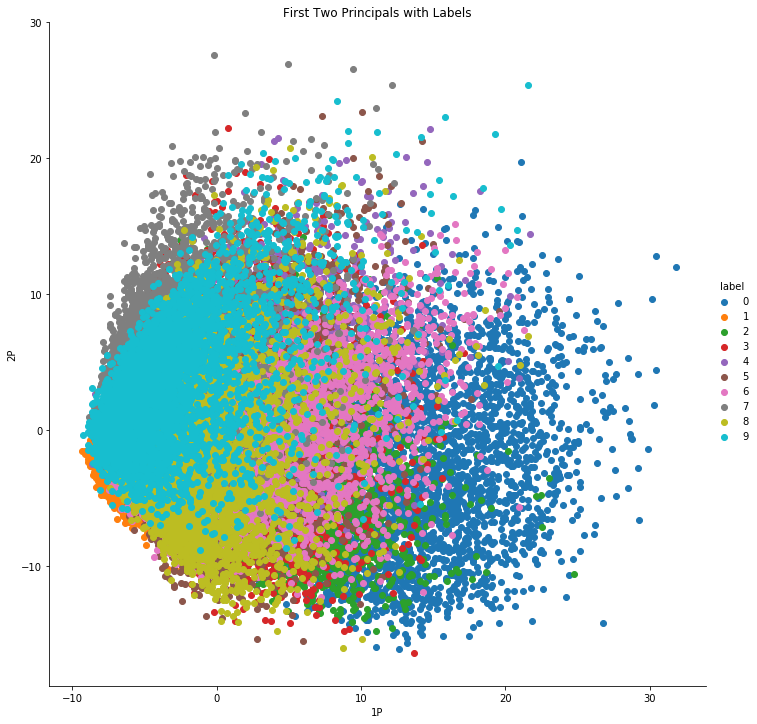

In [13]:
# Plot the PCA transformed data in 2D along with labels

# Transform the PCA output in to a dataframe and append the label column
# Provide meaningful names to the columns
pca_final_df = pd.DataFrame(data=pca_mnist, columns=("1P", "2P"))
pca_final_df['label'] = label

# Initialize the seaborn library
import seaborn as sn

# Scatter plot of the 2 principal components with label as the hue
sn.FacetGrid(pca_final_df, hue="label", height = 10).map(plt.scatter, '1P', '2P').add_legend()
plt.title('First Two Principals with Labels')
plt.show()

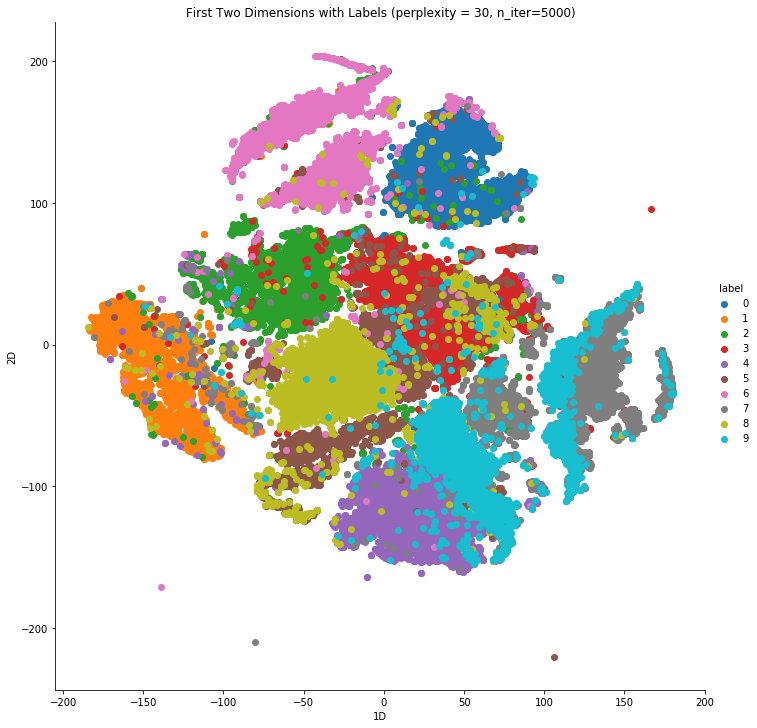

In [14]:
# Plot the tSNE transformed data in 2D along with labels

# Transform the tSNE output in to a dataframe and append the label column
# Provide meaningful names to the columns
tsne_final_df = pd.DataFrame(data=tsne_mnist, columns=("1D", "2D"))
tsne_final_df['label'] = label

# Initialize the seaborn library
import seaborn as sn

# Scatter plot of the 2 principal components with label as the hue
sn.FacetGrid(tsne_final_df, hue="label", height = 10).map(plt.scatter, '1D', '2D').add_legend()
plt.title('First Two Dimensions with Labels (perplexity = 30, n_iter=5000)')
plt.show()